# **ElasticNet Regression - Practical Implementation**

In [24]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
path = '/content/housing.csv'
df = pd.read_csv(path)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Train Test Split**

In [3]:
# importing library
from sklearn.model_selection import train_test_split

In [9]:
# splitting
X = df.drop('MEDV', axis=1)
y = df[['MEDV']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Standardizing**

In [6]:
# importing library
from sklearn.preprocessing import StandardScaler

In [11]:
# standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **ElasticNet Regression Implementation**

In [12]:
# importing ElasticNet
from sklearn.linear_model import ElasticNet

# importing gridsearchcv
from sklearn.model_selection import GridSearchCV

**Training**

In [13]:
elasticnet_reg = ElasticNet()

In [19]:
parameters = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}
elasticnet_reg_cv = GridSearchCV(elasticnet_reg, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
elasticnet_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                   50],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [20]:
# best parameters
elasticnet_reg_cv.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [21]:
# best score
elasticnet_reg_cv.best_score_

-25.92469234048617

**Testing**

In [22]:
elasticnet_pred = elasticnet_reg_cv.predict(X_test)
elasticnet_pred

array([27.98732612, 35.37357617, 16.89833499, 25.15681503, 18.74705376,
       23.0797938 , 18.03976148, 14.85336182, 21.84391711, 20.93125532,
       24.53453836, 19.57809614, -4.99665352, 22.15369338, 19.54633063,
       25.2838087 , 19.03818872,  6.00008932, 38.99739295, 17.57330008,
       26.76516517, 28.95637434, 12.33300441, 24.199505  , 17.80172858,
       15.16432292, 23.05491585, 15.09609077, 22.66118118, 19.80211976,
       21.73255137, 25.23236273, 24.76202934, 18.16643289, 16.02148473,
       18.57890926, 30.90559564, 20.61349502, 24.26587119, 24.75945394,
       14.7270371 , 30.22284492, 40.36703471, 18.52884627, 26.87801223,
       16.81130618, 14.77942509, 25.95072217, 19.57847376, 30.28263652,
       21.98651135, 33.11080902, 16.67398257, 26.25024671, 38.05095753,
       22.3797789 , 18.82451782, 31.47216283, 24.96617643, 14.25148619,
       23.41359494, 30.49190115, 30.58748689, 16.96345862, 23.33030417,
       17.17984831, 19.95685607, 25.93805166, 30.02946169, 12.38

<Axes: ylabel='Density'>

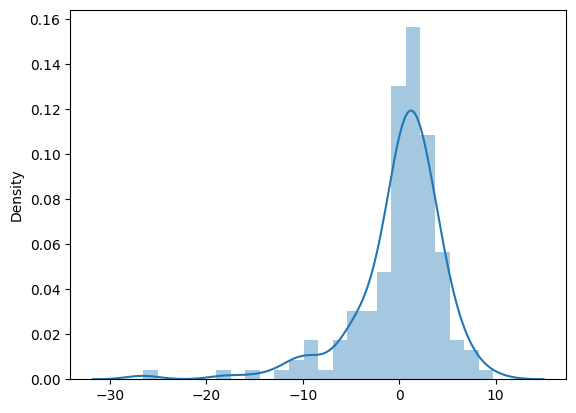

In [25]:
sns.distplot(elasticnet_pred.reshape(len(elasticnet_pred), 1) - y_test)